<a href="https://colab.research.google.com/github/brunopereirabzr/Jogo-pedra-papel-tesoura/blob/main/Pre_processamento_UAE_Cancer_Patient_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Base: UAE Cancer Patient Dataset

Base de dados de pacientes com câncer – UAE Cancer Patient Dataset
A base de dados escolhida para este trabalho é um dataset público que contém informações clínicas e demográficas de pacientes com câncer nos Emirados Árabes Unidos (UAE). Essa base é bastante relevante para estudos de saúde pública, análise preditiva e aprendizado de máquina aplicado à medicina, pois permite compreender melhor o perfil dos pacientes, os tratamentos adotados e os desfechos clínicos.

Essa base foi utilizada em estudos voltados para classificação de desfechos clínicos, como recuperação, tratamento contínuo ou óbito, e também pode auxiliar na criação de modelos de previsão e análise de fatores de risco.

Disponivel: https://www.kaggle.com/datasets/ak0212/uae-cancer-patient-dataset

*Variaveis:*

Patient_ID: Identificação única de cada paciente

Age: Idade do paciente

Gender: Gênero do paciente (masculino ou feminino)

Nationality: Nacionalidade

Bmi: Índice de massa corporal (IMC)

Diagnosis_Date: Data em que o câncer foi diagnosticado

Cancer_Type: Tipo de câncer diagnosticado

Cancer_Stage: Estágio do câncer

Treatment_Type: Tipo de tratamento recebido

Treatment_Start_Date: Data de início do tratamento

Hospital: Nome do hospital onde foi realizado o tratamento

Outcome: Desfecho clínico do paciente (recuperado, em tratamento, ou falecido
)

Death_Date: Data do falecimento (se aplicável)

Cause_of_Death: Causa do óbito (quando houver)

Smoking_Status: Status de tabagismo (fumante, ex-fumante, não fumante)

Comorbidities: Presença de comorbidades

Ethnicity: Grupo étnico do paciente

Height: Altura do paciente (em cm)

Weight: Peso do paciente (em kg)









Importando as bibliotecas que serão usadas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Motando o google drive no colab para acessar o arquivo csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Ler um arquivo CSV e exibe as primeiras linhas do conjunto de dados

In [ ]:
base = pd.read_csv('/content/drive/MyDrive/ads2/apq/cance.csv')
base.head()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaN,NaN,Non-Smoker,NaN,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Dr. SM31,Recovered,NaN,NaN,Smoker,NaN,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Dr. BC7,Under Treatment,NaN,NaN,Non-Smoker,NaN,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaN,NaN,Former Smoker,NaN,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaN,NaN,Former Smoker,NaN,East Asian,101,160


Dimensão da base

In [ ]:
base.shape

(10000, 20)

A análise dos tipos de variáveis revela que 'Death_Date', 'Cause_of_Death' e 'Comorbidities' contêm valores ausentes, indicando a necessidade de tratamento prévio desses dados.

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            10000 non-null  object
 1   Age                   10000 non-null  int64 
 2   Gender                10000 non-null  object
 3   Nationality           10000 non-null  object
 4   Emirate               10000 non-null  object
 5   Diagnosis_Date        10000 non-null  object
 6   Cancer_Type           10000 non-null  object
 7   Cancer_Stage          10000 non-null  object
 8   Treatment_Type        10000 non-null  object
 9   Treatment_Start_Date  10000 non-null  object
 10  Hospital              10000 non-null  object
 11  Primary_Physician     10000 non-null  object
 12  Outcome               10000 non-null  object
 13  Death_Date            992 non-null    object
 14  Cause_of_Death        992 non-null    object
 15  Smoking_Status        10000 non-null 

Neste ponto, identificamos o número de valores únicos presentes em cada variável.

In [ ]:
base.nunique()

,0
Patient_ID,10000
Age,72
Gender,3
Nationality,2
Emirate,7
Diagnosis_Date,3151
Cancer_Type,8
Cancer_Stage,4
Treatment_Type,4
Treatment_Start_Date,3250


Aqui podemos visualizar a quantidade de valores ausentes em cada variável.

In [ ]:
base.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Nationality,0
Emirate,0
Diagnosis_Date,0
Cancer_Type,0
Cancer_Stage,0
Treatment_Type,0
Treatment_Start_Date,0


Retorna as linhas em que a coluna Death_Date possui valores ausentes.

In [ ]:
base.loc[base['Death_Date'].isnull()]

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaN,NaN,Non-Smoker,NaN,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Dr. SM31,Recovered,NaN,NaN,Smoker,NaN,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Dr. BC7,Under Treatment,NaN,NaN,Non-Smoker,NaN,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaN,NaN,Former Smoker,NaN,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaN,NaN,Former Smoker,NaN,East Asian,101,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,PAT009996,88,Male,Emirati,Ras Al Khaimah,2016-01-21,Ovarian,II,Surgery,2016-04-03,Sheikh Khalifa Hospital,Dr. FJ27,Recovered,NaN,NaN,Smoker,Cardiovascular Disease,European,55,168
9996,PAT009997,43,Male,Emirati,Sharjah,2018-12-06,Ovarian,III,Radiation,2019-03-23,Cleveland Clinic Abu Dhabi,Dr. JB17,Under Treatment,NaN,NaN,Non-Smoker,Diabetes,African,98,175
9997,PAT009998,63,Female,Emirati,Sharjah,2016-06-11,Lung,III,Chemotherapy,2016-10-21,Dubai Hospital,Dr. ZG45,Under Treatment,NaN,NaN,Non-Smoker,NaN,East Asian,92,165
9998,PAT009999,63,Female,Emirati,Abu Dhabi,2018-11-12,Lung,IV,Immunotherapy,2019-02-05,Cleveland Clinic Abu Dhabi,Dr. EL16,Recovered,NaN,NaN,Smoker,Hypertension,European,68,193


 A coluna Death_Date refere-se à data de falecimento do paciente. Assim, as entradas com valores ausentes indicam pacientes ainda vivos. Por se tratar de uma data, o tipo da coluna deve ser datetime, antes de converter ela precisamos transformar esse NaN em NaT.

In [ ]:
base['Death_Date'] = base['Death_Date'].fillna(pd.NaT)
base.head()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaT,NaN,Non-Smoker,NaN,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Dr. SM31,Recovered,NaT,NaN,Smoker,NaN,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Dr. BC7,Under Treatment,NaT,NaN,Non-Smoker,NaN,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaT,NaN,Former Smoker,NaN,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaT,NaN,Former Smoker,NaN,East Asian,101,160


Convertendo a variável Death_Date para o tipo de dado datetime.

In [ ]:
base['Death_Date'] = pd.to_datetime(base['Death_Date'])

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Patient_ID            10000 non-null  object        
 1   Age                   10000 non-null  int64         
 2   Gender                10000 non-null  object        
 3   Nationality           10000 non-null  object        
 4   Emirate               10000 non-null  object        
 5   Diagnosis_Date        10000 non-null  object        
 6   Cancer_Type           10000 non-null  object        
 7   Cancer_Stage          10000 non-null  object        
 8   Treatment_Type        10000 non-null  object        
 9   Treatment_Start_Date  10000 non-null  object        
 10  Hospital              10000 non-null  object        
 11  Primary_Physician     10000 non-null  object        
 12  Outcome               10000 non-null  object        
 13  Death_Date       

A coluna Cause_of_Death também possui valores ausentes. Antes de preenchê-los, vamos analisar quais são os valores existentes nessa coluna.

In [ ]:
print(base['Cause_of_Death'].unique())

[nan 'Cancer' 'Complications']


Após visualizar os valores únicos, contamos quantas vezes cada valor aparece na coluna Cause_of_Death. Essa análise é importante para entender a distribuição dos dados e verificar se há algum desequilíbrio nas categorias.



In [ ]:
contagem = base['Cause_of_Death'].value_counts()
print(contagem)

NameError: name 'base' is not defined

Como identificamos valores ausentes, decidimos substituí-los por 0. Essa escolha pode representar a ausência de informação sobre a causa da morte, facilitando o tratamento desses dados em etapas posteriores.



In [ ]:
base['Cause_of_Death'] = base['Cause_of_Death'].fillna(0)
base.head()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaT,0,Non-Smoker,NaN,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Dr. SM31,Recovered,NaT,0,Smoker,NaN,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Dr. BC7,Under Treatment,NaT,0,Non-Smoker,NaN,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaT,0,Former Smoker,NaN,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaT,0,Former Smoker,NaN,East Asian,101,160


Convertendo os valores categóricos da coluna Cause_of_Death em valores numéricos, tornamos os dados compatíveis com algoritmos de aprendizado de máquina, que não trabalham com texto. Aqui, Cancer foi codificado como 1 e Complications como 2.

In [ ]:
base['Cause_of_Death'] = base['Cause_of_Death'].replace({'Cancer': 1, 'Complications' : 2})

<ipython-input-276-529a2faee467>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base['Cause_of_Death'] = base['Cause_of_Death'].replace({'Cancer': 1, 'Complications' : 2})


Após o preenchimento dos valores ausentes e a substituição por números, reimprimimos os valores únicos da coluna para confirmar que a transformação foi feita corretamente. Agora temos apenas valores numéricos: 0, 1 e 2.

In [ ]:
print(base['Cause_of_Death'].unique())

[0 1 2]


Realizamos novamente a contagem de valores na coluna Cause_of_Death, agora com os dados já tratados.

In [ ]:
contagem = base['Cause_of_Death'].value_counts()
print(contagem)

Cause_of_Death
0    9008
2     507
1     485
Name: count, dtype: int64


Aqui usamos o base.info() pra visualizar as colunas do nosso dataset, a quantidade de valores não nulos e os tipos de dados.

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Patient_ID            10000 non-null  object        
 1   Age                   10000 non-null  int64         
 2   Gender                10000 non-null  object        
 3   Nationality           10000 non-null  object        
 4   Emirate               10000 non-null  object        
 5   Diagnosis_Date        10000 non-null  object        
 6   Cancer_Type           10000 non-null  object        
 7   Cancer_Stage          10000 non-null  object        
 8   Treatment_Type        10000 non-null  object        
 9   Treatment_Start_Date  10000 non-null  object        
 10  Hospital              10000 non-null  object        
 11  Primary_Physician     10000 non-null  object        
 12  Outcome               10000 non-null  object        
 13  Death_Date       

Nesse trecho, usamos o .unique() pra ver quais são os valores diferentes que aparecem na coluna Comorbidities. Descobrimos que existem comorbidades como 'Hypertension', 'Cardiovascular Disease' e 'Diabetes', além dos valores ausentes (NaN).

In [ ]:
print(base['Comorbidities'].unique())

[nan 'Hypertension' 'Cardiovascular Disease' 'Diabetes']


Aqui tratamos os valores ausentes da coluna Comorbidities, substituindo os NaNs por 0. Consideramos que 0 representa a ausência de comorbidades. Fizemos isso pra evitar problemas futuros na análise e manter os dados consistentes.

In [ ]:
base['Comorbidities'] = base['Comorbidities'].fillna(0)

Depois de preencher os valores faltantes, usamos o value_counts() pra contar quantas vezes cada valor aparece na coluna. Isso ajudou a visualizar quantos pacientes têm cada tipo de comorbidade ou nenhuma.



In [ ]:
contagem = base['Comorbidities'].value_counts()
print(contagem)

Comorbidities
0                         4047
Hypertension              2945
Diabetes                  2005
Cardiovascular Disease    1003
Name: count, dtype: int64


Convertendo os valores da coluna Comorbidities de texto para números, pra facilitar a análise e o uso em modelos de machine learning.

In [ ]:
base['Comorbidities'] = base['Comorbidities'].replace({'Hypertension': 1, 'Cardiovascular Disease' : 2, 'Diabetes' : 3})

<ipython-input-283-2bfab23053b1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base['Comorbidities'] = base['Comorbidities'].replace({'Hypertension': 1, 'Cardiovascular Disease' : 2, 'Diabetes' : 3})


Aqui recontamos os valores após a substituição, pra garantir que tudo foi alterado corretamente. Agora os dados estão padronizados em formato numérico.

In [ ]:
# Contar valores na coluna 'nome_da_coluna'
contagem = base['Comorbidities'].value_counts()
print(contagem)

Comorbidities
0    4047
1    2945
3    2005
2    1003
Name: count, dtype: int64


In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Patient_ID            10000 non-null  object        
 1   Age                   10000 non-null  int64         
 2   Gender                10000 non-null  object        
 3   Nationality           10000 non-null  object        
 4   Emirate               10000 non-null  object        
 5   Diagnosis_Date        10000 non-null  object        
 6   Cancer_Type           10000 non-null  object        
 7   Cancer_Stage          10000 non-null  object        
 8   Treatment_Type        10000 non-null  object        
 9   Treatment_Start_Date  10000 non-null  object        
 10  Hospital              10000 non-null  object        
 11  Primary_Physician     10000 non-null  object        
 12  Outcome               10000 non-null  object        
 13  Death_Date       

Checamos os valores únicos da coluna Patient_ID pra ver como estão os identificadores dos pacientes. Foi possível perceber que cada paciente tem um id unico, porém eles são strings.



In [ ]:
print(base['Patient_ID'].unique())

['PAT000001' 'PAT000002' 'PAT000003' ... 'PAT009998' 'PAT009999'
 'PAT010000']


Geramos novos identificadores únicos do tipo int pra cada paciente, indo de 1 até a quantidade total de linhas da base.

In [ ]:
base['Patient_ID2'] = range(1, base.shape[0] + 1)

Aqui, a gente conferiu os valores únicos da nova coluna Patient_ID2, que foi criada anteriormente com IDs sequenciais de 1 até 10.000.

In [ ]:
print(base['Patient_ID2'].unique())

[    1     2     3 ...  9998  9999 10000]


Agora a gente substituiu o antigo Patient_ID pelos novos valores que estavam em Patient_ID2. Depois disso, a coluna auxiliar Patient_ID2 foi apagada, porque ela não era mais necessária.



In [ ]:
base['Patient_ID'] = base['Patient_ID2']
base = base.drop(['Patient_ID2'], axis=1)

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Patient_ID            10000 non-null  int64         
 1   Age                   10000 non-null  int64         
 2   Gender                10000 non-null  object        
 3   Nationality           10000 non-null  object        
 4   Emirate               10000 non-null  object        
 5   Diagnosis_Date        10000 non-null  object        
 6   Cancer_Type           10000 non-null  object        
 7   Cancer_Stage          10000 non-null  object        
 8   Treatment_Type        10000 non-null  object        
 9   Treatment_Start_Date  10000 non-null  object        
 10  Hospital              10000 non-null  object        
 11  Primary_Physician     10000 non-null  object        
 12  Outcome               10000 non-null  object        
 13  Death_Date       

Aqui a gente checou os valores únicos da coluna Gender (gênero). Encontramos três categorias: Female, Male, Other. É importante verificar isso pra saber se há algum valor fora do padrão ou que precisa ser tratado.

In [ ]:
print(base['Gender'].unique())

['Female' 'Male' 'Other']


Aqui, a gente contou quantas vezes cada gênero aparece na base. Isso ajuda a entender a distribuição dos dados.

In [ ]:
contagem = base['Gender'].value_counts()
print(contagem)

Gender
Female    4985
Male      4827
Other      188
Name: count, dtype: int64


Transformamos os valores de texto da coluna Gender em números.

In [ ]:
base['Gender'] = base['Gender'].replace({'Other': 0, 'Female' : 1, 'Male' : 2})

<ipython-input-293-c4eae76a316c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base['Gender'] = base['Gender'].replace({'Other': 0, 'Female' : 1, 'Male' : 2})


Confirmamos se a substituição deu certo, e agora só aparecem os números [1, 2, 0] no lugar dos textos.

In [ ]:
print(base['Gender'].unique())

[1 2 0]


In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Patient_ID            10000 non-null  int64         
 1   Age                   10000 non-null  int64         
 2   Gender                10000 non-null  int64         
 3   Nationality           10000 non-null  object        
 4   Emirate               10000 non-null  object        
 5   Diagnosis_Date        10000 non-null  object        
 6   Cancer_Type           10000 non-null  object        
 7   Cancer_Stage          10000 non-null  object        
 8   Treatment_Type        10000 non-null  object        
 9   Treatment_Start_Date  10000 non-null  object        
 10  Hospital              10000 non-null  object        
 11  Primary_Physician     10000 non-null  object        
 12  Outcome               10000 non-null  object        
 13  Death_Date       

Fizemos a mesma conversão que no gênero, substituindo os textos por números.

In [ ]:
print(base['Nationality'].unique())
base['Nationality'] = base['Nationality'].replace({'Emirati': 1, 'Expatriate' : 2})

['Emirati' 'Expatriate']


<ipython-input-296-c930d92f877a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base['Nationality'] = base['Nationality'].replace({'Emirati': 1, 'Expatriate' : 2})


In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Patient_ID            10000 non-null  int64         
 1   Age                   10000 non-null  int64         
 2   Gender                10000 non-null  int64         
 3   Nationality           10000 non-null  int64         
 4   Emirate               10000 non-null  object        
 5   Diagnosis_Date        10000 non-null  object        
 6   Cancer_Type           10000 non-null  object        
 7   Cancer_Stage          10000 non-null  object        
 8   Treatment_Type        10000 non-null  object        
 9   Treatment_Start_Date  10000 non-null  object        
 10  Hospital              10000 non-null  object        
 11  Primary_Physician     10000 non-null  object        
 12  Outcome               10000 non-null  object        
 13  Death_Date       

Aqui, conferimos quais eram os valores únicos presentes na coluna Emirate, que indicam de qual emirado dos Emirados Árabes o paciente é.

In [ ]:
print(base['Emirate'].unique())

['Umm Al Quwain' 'Abu Dhabi' 'Fujairah' 'Ras Al Khaimah' 'Sharjah' 'Dubai'
 'Ajman']


Mais uma vez, convertendo os valores de texto para números para facilitar o trabalho dos algoritmos de Machine Learning. Agora cada emirado foi representado por um número.

In [ ]:
base['Emirate'] = base['Emirate'].replace({'Umm Al Quwain': 1, 'Abu Dhabi' : 2, 'Fujairah' : 3, 'Ras Al Khaimah' : 4, 'Sharjah' : 5, 'Dubai' : 6, 'Ajman' : 7})

<ipython-input-299-1f9c48e28ced>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base['Emirate'] = base['Emirate'].replace({'Umm Al Quwain': 1, 'Abu Dhabi' : 2, 'Fujairah' : 3, 'Ras Al Khaimah' : 4, 'Sharjah' : 5, 'Dubai' : 6, 'Ajman' : 7})


Confirmamos que a conversão deu certo. Agora a coluna Emirate só contém números de 1 a 7.

In [ ]:
print(base['Emirate'].unique())

[1 2 3 4 5 6 7]


In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Patient_ID            10000 non-null  int64         
 1   Age                   10000 non-null  int64         
 2   Gender                10000 non-null  int64         
 3   Nationality           10000 non-null  int64         
 4   Emirate               10000 non-null  int64         
 5   Diagnosis_Date        10000 non-null  object        
 6   Cancer_Type           10000 non-null  object        
 7   Cancer_Stage          10000 non-null  object        
 8   Treatment_Type        10000 non-null  object        
 9   Treatment_Start_Date  10000 non-null  object        
 10  Hospital              10000 non-null  object        
 11  Primary_Physician     10000 non-null  object        
 12  Outcome               10000 non-null  object        
 13  Death_Date       

Esse comando exibe as primeiras 5 linhas do dataset, o que é ótimo para termos uma visão geral dos dados após o pré-processamento das colunas Gender, Nationality e Emirate. Aqui conseguimos observar os nomes das colunas e os valores já convertidos.



In [ ]:
base.head()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,1,69,1,1,1,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaT,0,Non-Smoker,0,European,61,157
1,2,32,2,1,1,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Dr. SM31,Recovered,NaT,0,Smoker,0,South Asian,80,175
2,3,89,2,1,2,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Dr. BC7,Under Treatment,NaT,0,Non-Smoker,0,South Asian,50,175
3,4,78,1,1,2,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaT,0,Former Smoker,0,African,44,155
4,5,38,1,1,3,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaT,0,Former Smoker,0,East Asian,101,160


A coluna Diagnosis_Date estava como texto (object), então foi convertida para o formato de data (datetime). Isso é essencial caso a gente vá fazer análises temporais, como calcular o tempo de tratamento, agrupar por ano de diagnóstico, etc.

In [ ]:
base['Diagnosis_Date'] = pd.to_datetime(base['Diagnosis_Date'])

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Patient_ID            10000 non-null  int64         
 1   Age                   10000 non-null  int64         
 2   Gender                10000 non-null  int64         
 3   Nationality           10000 non-null  int64         
 4   Emirate               10000 non-null  int64         
 5   Diagnosis_Date        10000 non-null  datetime64[ns]
 6   Cancer_Type           10000 non-null  object        
 7   Cancer_Stage          10000 non-null  object        
 8   Treatment_Type        10000 non-null  object        
 9   Treatment_Start_Date  10000 non-null  object        
 10  Hospital              10000 non-null  object        
 11  Primary_Physician     10000 non-null  object        
 12  Outcome               10000 non-null  object        
 13  Death_Date       

Aqui identificamos os tipos de câncer presentes no dataset.

In [ ]:
print(base['Cancer_Type'].unique())

['Liver' 'Leukemia' 'Lung' 'Pancreatic' 'Breast' 'Ovarian' 'Prostate'
 'Colorectal']


Mais uma transformação para facilitar o uso pelos algoritmos: os tipos de câncer foram transformados de texto para números.

In [ ]:
base['Cancer_Type'] = base['Cancer_Type'].replace({'Liver': 1, 'Leukemia' : 2, 'Lung' : 3, 'Pancreatic' : 4, 'Breast' : 5, 'Ovarian' : 6, 'Prostate' : 7, 'Colorectal' : 8})

<ipython-input-306-99be8a4f4be3>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base['Cancer_Type'] = base['Cancer_Type'].replace({'Liver': 1, 'Leukemia' : 2, 'Lung' : 3, 'Pancreatic' : 4, 'Breast' : 5, 'Ovarian' : 6, 'Prostate' : 7, 'Colorectal' : 8})


In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Patient_ID            10000 non-null  int64         
 1   Age                   10000 non-null  int64         
 2   Gender                10000 non-null  int64         
 3   Nationality           10000 non-null  int64         
 4   Emirate               10000 non-null  int64         
 5   Diagnosis_Date        10000 non-null  datetime64[ns]
 6   Cancer_Type           10000 non-null  int64         
 7   Cancer_Stage          10000 non-null  object        
 8   Treatment_Type        10000 non-null  object        
 9   Treatment_Start_Date  10000 non-null  object        
 10  Hospital              10000 non-null  object        
 11  Primary_Physician     10000 non-null  object        
 12  Outcome               10000 non-null  object        
 13  Death_Date       

Aqui foi feita uma inspeção dos valores únicos na coluna Cancer_Stage, que representa o estágio do câncer.

In [ ]:
print(base['Cancer_Stage'].unique())

['II' 'III' 'I' 'IV']


Assim como foi feito com os tipos de câncer, os estágios foram convertidos de texto para valores numéricos (1 a 4).

In [ ]:
base['Cancer_Stage'] = base['Cancer_Stage'].replace({'I': 1, 'II' : 2, 'III' : 3, 'IV' : 4})

<ipython-input-309-8d79af5a73d8>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base['Cancer_Stage'] = base['Cancer_Stage'].replace({'I': 1, 'II' : 2, 'III' : 3, 'IV' : 4})


Confirmação de que a conversão foi feita corretamente.

In [ ]:
print(base['Cancer_Stage'].unique())

[2 3 1 4]


In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Patient_ID            10000 non-null  int64         
 1   Age                   10000 non-null  int64         
 2   Gender                10000 non-null  int64         
 3   Nationality           10000 non-null  int64         
 4   Emirate               10000 non-null  int64         
 5   Diagnosis_Date        10000 non-null  datetime64[ns]
 6   Cancer_Type           10000 non-null  int64         
 7   Cancer_Stage          10000 non-null  int64         
 8   Treatment_Type        10000 non-null  object        
 9   Treatment_Start_Date  10000 non-null  object        
 10  Hospital              10000 non-null  object        
 11  Primary_Physician     10000 non-null  object        
 12  Outcome               10000 non-null  object        
 13  Death_Date       

Esse comando mostra os tipos de tratamento presentes no dataset.

In [ ]:
print(base['Treatment_Type'].unique())

['Radiation' 'Surgery' 'Chemotherapy' 'Immunotherapy']


Aqui os tipos de tratamento também foram convertidos de texto para valores numéricos.

In [ ]:
base['Treatment_Type'] = base['Treatment_Type'].replace({'Radiation': 1, 'Surgery' : 2, 'Chemotherapy' : 3, 'Immunotherapy' : 4})

<ipython-input-313-69f95a5bf040>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base['Treatment_Type'] = base['Treatment_Type'].replace({'Radiation': 1, 'Surgery' : 2, 'Chemotherapy' : 3, 'Immunotherapy' : 4})


Verificação final de que os valores foram substituídos corretamente.

In [ ]:
print(base['Treatment_Type'].unique())

[1 2 3 4]


In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Patient_ID            10000 non-null  int64         
 1   Age                   10000 non-null  int64         
 2   Gender                10000 non-null  int64         
 3   Nationality           10000 non-null  int64         
 4   Emirate               10000 non-null  int64         
 5   Diagnosis_Date        10000 non-null  datetime64[ns]
 6   Cancer_Type           10000 non-null  int64         
 7   Cancer_Stage          10000 non-null  int64         
 8   Treatment_Type        10000 non-null  int64         
 9   Treatment_Start_Date  10000 non-null  object        
 10  Hospital              10000 non-null  object        
 11  Primary_Physician     10000 non-null  object        
 12  Outcome               10000 non-null  object        
 13  Death_Date       

Mostra todos os valores únicos na coluna de início do tratamento, para entendermos os formatos de datas presentes.

In [ ]:
print(base['Treatment_Start_Date'].unique())

['2020-12-04' '2015-11-05' '2018-08-03' ... '2024-06-02' '2016-09-16'
 '2017-12-23']


Converte a coluna de datas para o formato datetime, facilitando análises temporais depois.

In [ ]:
base['Treatment_Start_Date'] = pd.to_datetime(base['Treatment_Start_Date'])

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Patient_ID            10000 non-null  int64         
 1   Age                   10000 non-null  int64         
 2   Gender                10000 non-null  int64         
 3   Nationality           10000 non-null  int64         
 4   Emirate               10000 non-null  int64         
 5   Diagnosis_Date        10000 non-null  datetime64[ns]
 6   Cancer_Type           10000 non-null  int64         
 7   Cancer_Stage          10000 non-null  int64         
 8   Treatment_Type        10000 non-null  int64         
 9   Treatment_Start_Date  10000 non-null  datetime64[ns]
 10  Hospital              10000 non-null  object        
 11  Primary_Physician     10000 non-null  object        
 12  Outcome               10000 non-null  object        
 13  Death_Date       

Mostra os nomes únicos dos hospitais presentes na base de dados.

In [ ]:
print(base['Hospital'].unique())

['Sheikh Khalifa Hospital' 'Dubai Hospital' 'Zayed Military Hospital'
 'Cleveland Clinic Abu Dhabi']


Substitui os nomes dos hospitais por números para facilitar o uso do dado em modelos ou gráficos.

In [ ]:
base['Hospital'] = base['Hospital'].replace({'Sheikh Khalifa Hospital': 1, 'Dubai Hospital' : 2, 'Zayed Military Hospital' : 3, 'Cleveland Clinic Abu Dhabi' : 4})

<ipython-input-320-41ff4f278310>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base['Hospital'] = base['Hospital'].replace({'Sheikh Khalifa Hospital': 1, 'Dubai Hospital' : 2, 'Zayed Military Hospital' : 3, 'Cleveland Clinic Abu Dhabi' : 4})


Verificamos se a substituição dos nomes dos hospitais por números foi feita corretamente.

In [ ]:
print(base['Hospital'].unique())

[1 2 3 4]


In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Patient_ID            10000 non-null  int64         
 1   Age                   10000 non-null  int64         
 2   Gender                10000 non-null  int64         
 3   Nationality           10000 non-null  int64         
 4   Emirate               10000 non-null  int64         
 5   Diagnosis_Date        10000 non-null  datetime64[ns]
 6   Cancer_Type           10000 non-null  int64         
 7   Cancer_Stage          10000 non-null  int64         
 8   Treatment_Type        10000 non-null  int64         
 9   Treatment_Start_Date  10000 non-null  datetime64[ns]
 10  Hospital              10000 non-null  int64         
 11  Primary_Physician     10000 non-null  object        
 12  Outcome               10000 non-null  object        
 13  Death_Date       

Mostra todos os nomes únicos dos médicos responsáveis ('Primary Physician').

In [ ]:
print(base['Primary_Physician'].unique())

['Dr. VO41' 'Dr. SM31' 'Dr. BC7' ... 'Dr. WT6' 'Dr. JB17' 'Dr. SI45']


Remove a coluna dos médicos porque ela provavelmente não é útil para a análise ou tem dados demais diferentes.



In [ ]:
base = base.drop(['Primary_Physician'], axis=1)

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Patient_ID            10000 non-null  int64         
 1   Age                   10000 non-null  int64         
 2   Gender                10000 non-null  int64         
 3   Nationality           10000 non-null  int64         
 4   Emirate               10000 non-null  int64         
 5   Diagnosis_Date        10000 non-null  datetime64[ns]
 6   Cancer_Type           10000 non-null  int64         
 7   Cancer_Stage          10000 non-null  int64         
 8   Treatment_Type        10000 non-null  int64         
 9   Treatment_Start_Date  10000 non-null  datetime64[ns]
 10  Hospital              10000 non-null  int64         
 11  Outcome               10000 non-null  object        
 12  Death_Date            992 non-null    datetime64[ns]
 13  Cause_of_Death   

Mostra os tipos de desfechos dos pacientes: recuperado, em tratamento ou falecido.



In [ ]:
print(base['Outcome'].unique())

['Recovered' 'Under Treatment' 'Deceased']


Transformamos os desfechos em números para facilitar a análise e uso em modelos.



In [ ]:
base['Outcome'] = base['Outcome'].replace({'Recovered': 1, 'Under Treatment' : 2, 'Deceased' : 3})

<ipython-input-327-ee1b457e2fec>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base['Outcome'] = base['Outcome'].replace({'Recovered': 1, 'Under Treatment' : 2, 'Deceased' : 3})


In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Patient_ID            10000 non-null  int64         
 1   Age                   10000 non-null  int64         
 2   Gender                10000 non-null  int64         
 3   Nationality           10000 non-null  int64         
 4   Emirate               10000 non-null  int64         
 5   Diagnosis_Date        10000 non-null  datetime64[ns]
 6   Cancer_Type           10000 non-null  int64         
 7   Cancer_Stage          10000 non-null  int64         
 8   Treatment_Type        10000 non-null  int64         
 9   Treatment_Start_Date  10000 non-null  datetime64[ns]
 10  Hospital              10000 non-null  int64         
 11  Outcome               10000 non-null  int64         
 12  Death_Date            992 non-null    datetime64[ns]
 13  Cause_of_Death   

A gente imprimiu os tipos únicos de status de fumo para ver quais categorias existiam na base.

In [ ]:
print(base['Smoking_Status'].unique())

['Non-Smoker' 'Smoker' 'Former Smoker']


Convertimos essas categorias para números, o que ajuda bastante nas análises estatísticas e modelagens.



In [ ]:
base['Smoking_Status'] = base['Smoking_Status'].replace({'Non-Smoker': 1, 'Smoker' : 2, 'Former Smoker' : 3})

<ipython-input-330-d0fbe51463d4>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base['Smoking_Status'] = base['Smoking_Status'].replace({'Non-Smoker': 1, 'Smoker' : 2, 'Former Smoker' : 3})


Rodamos o info() de novo pra garantir que a alteração foi feita corretamente e os tipos de dados estão como esperado.

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Patient_ID            10000 non-null  int64         
 1   Age                   10000 non-null  int64         
 2   Gender                10000 non-null  int64         
 3   Nationality           10000 non-null  int64         
 4   Emirate               10000 non-null  int64         
 5   Diagnosis_Date        10000 non-null  datetime64[ns]
 6   Cancer_Type           10000 non-null  int64         
 7   Cancer_Stage          10000 non-null  int64         
 8   Treatment_Type        10000 non-null  int64         
 9   Treatment_Start_Date  10000 non-null  datetime64[ns]
 10  Hospital              10000 non-null  int64         
 11  Outcome               10000 non-null  int64         
 12  Death_Date            992 non-null    datetime64[ns]
 13  Cause_of_Death   

Visualizamos os grupos étnicos únicos na base antes de fazer qualquer modificação.

In [ ]:
print(base['Ethnicity'].unique())

['European' 'South Asian' 'African' 'East Asian' 'Arab']


A gente transformou os grupos étnicos em números, igual fizemos com os outros dados categóricos.

In [ ]:
base['Ethnicity'] = base['Ethnicity'].replace({'European': 1, 'South Asian' : 2, 'African' : 3, 'East Asian' : 4, 'Arab' : 5})

<ipython-input-333-dbb54accdea0>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base['Ethnicity'] = base['Ethnicity'].replace({'European': 1, 'South Asian' : 2, 'African' : 3, 'East Asian' : 4, 'Arab' : 5})


Usamos head() pra visualizar as primeiras linhas da base e verificar como ficou depois de todas as modificações.



In [ ]:
base.head()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,1,69,1,1,1,2020-11-30,1,2,1,2020-12-04,1,1,NaT,0,1,0,1,61,157
1,2,32,2,1,1,2015-10-10,2,3,2,2015-11-05,2,1,NaT,0,2,0,2,80,175
2,3,89,2,1,2,2018-02-13,1,3,1,2018-08-03,3,2,NaT,0,1,0,2,50,175
3,4,78,1,1,2,2022-02-04,3,3,1,2022-03-13,4,1,NaT,0,3,0,3,44,155
4,5,38,1,1,3,2019-12-03,4,2,3,2020-02-29,1,1,NaT,0,3,0,4,101,160


Verificamos se existem linhas duplicadas no dataset usando .duplicated().sum(). Isso é importante pra garantir que não haja registros repetidos que possam afetar a análise.

In [ ]:
dados_duplicados = base.duplicated().sum()
print(f"Número de dados duplicados: {dados_duplicados}")

Número de dados duplicados: 0


Ao analisarmos o resultado de base.describe(), podemos observar os valores mínimos e máximos de cada coluna. Percebemos que a coluna Death_Date apresenta, em seu valor máximo, uma data que ainda não ocorreu. Isso indica a necessidade de uma correção para garantir a integridade dos dados e evitar inconsistências nas análises.

In [ ]:
base.describe()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000,10000.000000,10000.000000,992,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,53.539700,1.463900,1.408000,3.997800,2019-08-08 15:31:58.080000,4.467600,2.363000,2.496100,2019-11-05 23:51:38.880000,2.498600,1.606100,2020-12-31 22:57:34.838709760,0.149900,1.687900,1.096600,2.988000,69.550000,169.347500
min,1.00000,18.000000,0.000000,1.000000,1.000000,2015-01-01 00:00:00,1.000000,1.000000,1.000000,2015-01-07 00:00:00,1.000000,1.000000,2015-04-24 00:00:00,0.000000,1.000000,0.000000,1.000000,18.000000,131.000000
25%,2500.75000,36.000000,1.000000,1.000000,2.000000,2017-04-05 00:00:00,2.000000,2.000000,1.000000,2017-07-05 00:00:00,1.000000,1.000000,2018-09-21 00:00:00,0.000000,1.000000,0.000000,2.000000,60.000000,163.000000
50%,5000.50000,53.000000,1.000000,1.000000,4.000000,2019-08-26 12:00:00,4.000000,2.000000,2.000000,2019-11-24 00:00:00,2.000000,2.000000,2020-12-22 00:00:00,0.000000,1.000000,1.000000,3.000000,70.000000,169.000000
75%,7500.25000,72.000000,2.000000,2.000000,6.000000,2021-11-22 00:00:00,6.000000,3.000000,3.000000,2022-02-18 00:00:00,4.000000,2.000000,2023-05-24 12:00:00,0.000000,2.000000,2.000000,4.000000,80.000000,176.000000
max,10000.00000,89.000000,2.000000,2.000000,7.000000,2024-03-01 00:00:00,8.000000,4.000000,4.000000,2024-08-23 00:00:00,4.000000,3.000000,2026-05-15 00:00:00,2.000000,3.000000,3.000000,5.000000,122.000000,208.000000
std,2886.89568,20.757324,0.535094,0.491488,2.018168,NaN,2.292526,1.007935,1.119513,NaN,1.124866,0.661201,NaN,0.478386,0.773404,1.139209,1.411048,14.933339,10.070118


Ao analisarmos a descrição do dataset que estamos utilizando, identificamos que sua última atualização ocorreu há um mês. Diante disso, estabelecemos que qualquer data superior a 28 de fevereiro de 2025 deve ser ajustada para garantir a consistência dos dados.Antes de corrigimos as datas, primeiro precisamos saber quantas são

In [ ]:
data_referencia = pd.Timestamp("2025-02-28")

df_filtrado = base[base['Death_Date'] > data_referencia]
print(df_filtrado)

      Patient_ID  Age  Gender  Nationality  Emirate Diagnosis_Date  \
415          416   61       1            2        4     2023-08-13   
430          431   38       1            1        5     2023-12-13   
585          586   80       1            2        6     2023-01-23   
687          688   65       2            2        6     2023-04-25   
993          994   20       2            1        5     2022-09-03   
...          ...  ...     ...          ...      ...            ...   
9547        9548   23       1            2        2     2023-04-26   
9822        9823   74       2            1        1     2023-08-28   
9837        9838   47       1            1        3     2024-01-30   
9883        9884   38       2            1        5     2023-07-31   
9899        9900   23       1            2        2     2024-01-20   

      Cancer_Type  Cancer_Stage  Treatment_Type Treatment_Start_Date  \
415             2             1               4           2023-12-06   
430            

Devido à grande quantidade de dados, adotaremos a média como critério para corrigir as datas incorretas, garantindo maior coerência e precisão na análise.

In [ ]:
media_data = base['Death_Date'].mean()

data_limite = pd.Timestamp("2025-02-28")

base.loc[base['Death_Date'] > data_limite, 'Death_Date'] = media_data


In [ ]:
base.describe()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000,10000.000000,10000.000000,992,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,53.539700,1.463900,1.408000,3.997800,2019-08-08 15:31:58.080000,4.467600,2.363000,2.496100,2019-11-05 23:51:38.880000,2.498600,1.606100,2020-09-15 00:45:23.442377472,0.149900,1.687900,1.096600,2.988000,69.550000,169.347500
min,1.00000,18.000000,0.000000,1.000000,1.000000,2015-01-01 00:00:00,1.000000,1.000000,1.000000,2015-01-07 00:00:00,1.000000,1.000000,2015-04-24 00:00:00,0.000000,1.000000,0.000000,1.000000,18.000000,131.000000
25%,2500.75000,36.000000,1.000000,1.000000,2.000000,2017-04-05 00:00:00,2.000000,2.000000,1.000000,2017-07-05 00:00:00,1.000000,1.000000,2018-09-21 00:00:00,0.000000,1.000000,0.000000,2.000000,60.000000,163.000000
50%,5000.50000,53.000000,1.000000,1.000000,4.000000,2019-08-26 12:00:00,4.000000,2.000000,2.000000,2019-11-24 00:00:00,2.000000,2.000000,2020-12-22 00:00:00,0.000000,1.000000,1.000000,3.000000,70.000000,169.000000
75%,7500.25000,72.000000,2.000000,2.000000,6.000000,2021-11-22 00:00:00,6.000000,3.000000,3.000000,2022-02-18 00:00:00,4.000000,2.000000,2022-09-06 00:00:00,0.000000,2.000000,2.000000,4.000000,80.000000,176.000000
max,10000.00000,89.000000,2.000000,2.000000,7.000000,2024-03-01 00:00:00,8.000000,4.000000,4.000000,2024-08-23 00:00:00,4.000000,3.000000,2025-02-26 00:00:00,2.000000,3.000000,3.000000,5.000000,122.000000,208.000000
std,2886.89568,20.757324,0.535094,0.491488,2.018168,NaN,2.292526,1.007935,1.119513,NaN,1.124866,0.661201,NaN,0.478386,0.773404,1.139209,1.411048,14.933339,10.070118


Se olhamos da coluna Death_Date ainda tem valores ausentes, pois ele não foram preenchidos e sim trocados de NaN por NoT dado que a coluna é do tipo datetime.

In [ ]:
base.head()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,1,69,1,1,1,2020-11-30,1,2,1,2020-12-04,1,1,NaT,0,1,0,1,61,157
1,2,32,2,1,1,2015-10-10,2,3,2,2015-11-05,2,1,NaT,0,2,0,2,80,175
2,3,89,2,1,2,2018-02-13,1,3,1,2018-08-03,3,2,NaT,0,1,0,2,50,175
3,4,78,1,1,2,2022-02-04,3,3,1,2022-03-13,4,1,NaT,0,3,0,3,44,155
4,5,38,1,1,3,2019-12-03,4,2,3,2020-02-29,1,1,NaT,0,3,0,4,101,160


Como a data da morte é um dado importante, e não tem como botar um data fictícia, pois influenciaria muito. Preferimos criar um nova coluna chamada status_pacientes no qual colocamos 0 para morte e 1 para vivo

In [ ]:
base['status_paciente'] = base['Death_Date'].apply(lambda x: 0 if pd.notna(x) else 1)
base.head()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height,status_paciente
0,1,69,1,1,1,2020-11-30,1,2,1,2020-12-04,1,1,NaT,0,1,0,1,61,157,1
1,2,32,2,1,1,2015-10-10,2,3,2,2015-11-05,2,1,NaT,0,2,0,2,80,175,1
2,3,89,2,1,2,2018-02-13,1,3,1,2018-08-03,3,2,NaT,0,1,0,2,50,175,1
3,4,78,1,1,2,2022-02-04,3,3,1,2022-03-13,4,1,NaT,0,3,0,3,44,155,1
4,5,38,1,1,3,2019-12-03,4,2,3,2020-02-29,1,1,NaT,0,3,0,4,101,160,1


Confirmando se quantidade de paciente com status 1 é a mais que a quantidade de dados faltando da coluna Death_Date

In [ ]:
contagem = base['status_paciente'].value_counts()
print(contagem)

status_paciente
1    9008
0     992
Name: count, dtype: int64


Com os dados devidamente tratados, podemos agora visualizar algumas informações por meio de gráficos. Iniciamos pela distribuição dos tipos de câncer, analisando quantos pacientes pertencem a cada categoria.
Os tipos de câncer foram categorizados da seguinte forma:
- Liver (Fígado): 1
- Leukemia (Leucemia): 2
- Lung (Pulmão): 3
- Pancreatic (Pâncreas): 4
- Breast (Mama): 5
- Ovarian (Ovário): 6
- Prostate (Próstata): 7
- Colorectal (Colorretal): 8


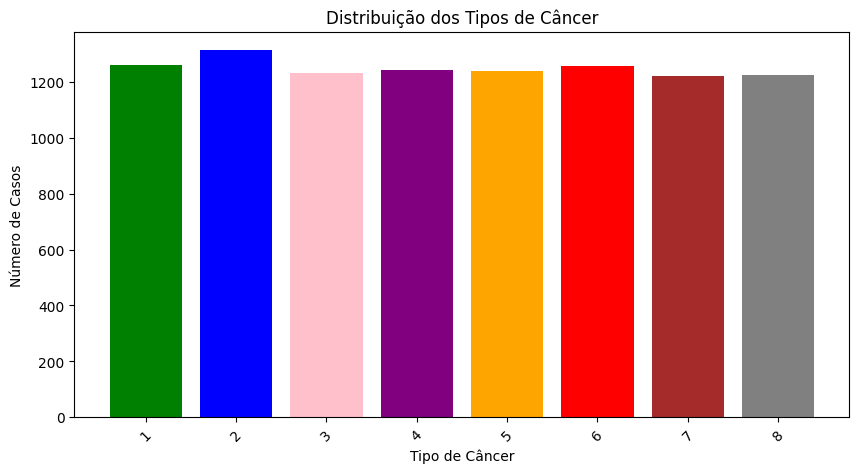

In [ ]:
plt.figure(figsize=(10, 5))

cancer_type_qtd = base['Cancer_Type'].value_counts()

plt.bar(cancer_type_qtd.index, cancer_type_qtd.values, color=['blue', 'green', 'red', 'purple', 'orange', 'pink', 'gray', 'brown'])
plt.xlabel("Tipo de Câncer")
plt.ylabel("Número de Casos")
plt.title("Distribuição dos Tipos de Câncer")
plt.xticks(rotation=45)
plt.show()

In [ ]:
base.head()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height,status_paciente
0,1,69,1,1,1,2020-11-30,1,2,1,2020-12-04,1,1,NaT,0,1,0,1,61,157,1
1,2,32,2,1,1,2015-10-10,2,3,2,2015-11-05,2,1,NaT,0,2,0,2,80,175,1
2,3,89,2,1,2,2018-02-13,1,3,1,2018-08-03,3,2,NaT,0,1,0,2,50,175,1
3,4,78,1,1,2,2022-02-04,3,3,1,2022-03-13,4,1,NaT,0,3,0,3,44,155,1
4,5,38,1,1,3,2019-12-03,4,2,3,2020-02-29,1,1,NaT,0,3,0,4,101,160,1


In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Patient_ID            10000 non-null  int64         
 1   Age                   10000 non-null  int64         
 2   Gender                10000 non-null  int64         
 3   Nationality           10000 non-null  int64         
 4   Emirate               10000 non-null  int64         
 5   Diagnosis_Date        10000 non-null  datetime64[ns]
 6   Cancer_Type           10000 non-null  int64         
 7   Cancer_Stage          10000 non-null  int64         
 8   Treatment_Type        10000 non-null  int64         
 9   Treatment_Start_Date  10000 non-null  datetime64[ns]
 10  Hospital              10000 non-null  int64         
 11  Outcome               10000 non-null  int64         
 12  Death_Date            992 non-null    datetime64[ns]
 13  Cause_of_Death   

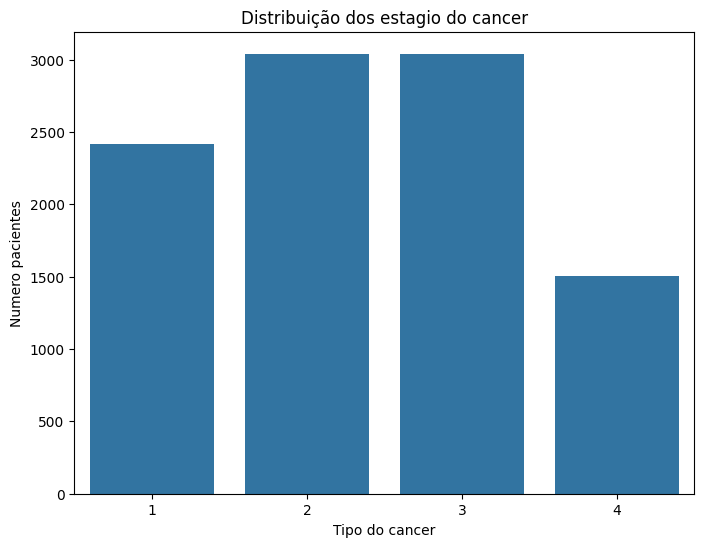

In [ ]:
cancer_stage_counts = base['Cancer_Stage'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=cancer_stage_counts.index, y=cancer_stage_counts.values)
plt.xlabel('Tipo do cancer')
plt.ylabel('Numero pacientes')
plt.title('Distribuição dos estagio do cancer')
plt.show()


In [ ]:
base.to_csv('cancerUAE_limpa.csv', index=False)